<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,30.489364,85.826487,85.363840,-110.150721,101.528971,547.096598,-445.567628
1,0.0,1.0,65.648008,26.294996,56.370679,-148.362027,9.951657,-177.030543,186.982200
2,0.0,2.0,94.286645,85.993817,95.186043,964.393373,1249.859879,298.440074,951.419805
3,0.0,3.0,54.554168,99.252643,62.528392,4567.359367,4793.694572,714.652222,4079.042350
4,0.0,4.0,87.090325,51.865125,35.089611,-457.488282,-273.443221,139.538005,-412.981225
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,42.542319,21.661909,68.837063,-193.359975,-50.318683,-25.228916,-25.089767
19996,999.0,16.0,27.882199,75.448024,89.977822,-1348.573723,-1145.265677,-703.020283,-442.245394
19997,999.0,17.0,29.240166,43.476382,59.761679,-612.631689,-470.153463,-203.309614,-266.843849
19998,999.0,18.0,36.095275,83.813001,64.319325,-2233.449963,-2039.222362,-213.662215,-1825.560147


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,30.489364,85.826487,85.363840,-110.150721,101.528971,547.096598,-445.567628
1,0.0,1.0,65.648008,26.294996,56.370679,-148.362027,9.951657,-177.030543,186.982200
2,0.0,2.0,94.286645,85.993817,95.186043,964.393373,1249.859879,298.440074,951.419805
3,0.0,3.0,54.554168,99.252643,62.528392,4567.359367,4793.694572,714.652222,4079.042350
4,0.0,4.0,87.090325,51.865125,35.089611,-457.488282,-273.443221,139.538005,-412.981225
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,42.542319,21.661909,68.837063,-193.359975,-50.318683,-25.228916,-25.089767
19996,999.0,16.0,27.882199,75.448024,89.977822,-1348.573723,-1145.265677,-703.020283,-442.245394
19997,999.0,17.0,29.240166,43.476382,59.761679,-612.631689,-470.153463,-203.309614,-266.843849
19998,999.0,18.0,36.095275,83.813001,64.319325,-2233.449963,-2039.222362,-213.662215,-1825.560147


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    30.489364  85.826487  ...  547.096598  -445.567628
      1.0    65.648008  26.294996  ... -177.030543   186.982200
      2.0    94.286645  85.993817  ...  298.440074   951.419805
      3.0    54.554168  99.252643  ...  714.652222  4079.042350
      4.0    87.090325  51.865125  ...  139.538005  -412.981225
...                ...        ...  ...         ...          ...
999.0 15.0   42.542319  21.661909  ...  -25.228916   -25.089767
      16.0   27.882199  75.448024  ... -703.020283  -442.245394
      17.0   29.240166  43.476382  ... -203.309614  -266.843849
      18.0   36.095275  83.813001  ... -213.662215 -1825.560147
      19.0   32.339959  31.585989  ... -182.142664   847.239492

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    30.489364  85.826487  ...  547.096598  -445.567628
      1.0    65.648008  26.294996  ... -177.030543   186.982200
      2.0    94.286645  85.993817  ...  298.440074   951.419805
      3.0    54.554168  99.252643  ...  714.652222  4079.042350
      4.0    87.090325  51.865125  ...  139.538005  -412.981225
...                ...        ...  ...         ...          ...
999.0 15.0   42.542319  21.661909  ...  -25.228916   -25.089767
      16.0   27.882199  75.448024  ... -703.020283  -442.245394
      17.0   29.240166  43.476382  ... -203.309614  -266.843849
      18.0   36.095275  83.813001  ... -213.662215 -1825.560147
      19.0   32.339959  31.585989  ... -182.142664   847.239492

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,30.489364,85.826487,85.363840,-110.150721,101.528971,547.096598,-445.567628
1,0.0,1.0,65.648008,26.294996,56.370679,-148.362027,9.951657,-177.030543,186.982200
2,0.0,2.0,94.286645,85.993817,95.186043,964.393373,1249.859879,298.440074,951.419805
3,0.0,3.0,54.554168,99.252643,62.528392,4567.359367,4793.694572,714.652222,4079.042350
4,0.0,4.0,87.090325,51.865125,35.089611,-457.488282,-273.443221,139.538005,-412.981225
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,42.542319,21.661909,68.837063,-193.359975,-50.318683,-25.228916,-25.089767
19996,999.0,16.0,27.882199,75.448024,89.977822,-1348.573723,-1145.265677,-703.020283,-442.245394
19997,999.0,17.0,29.240166,43.476382,59.761679,-612.631689,-470.153463,-203.309614,-266.843849
19998,999.0,18.0,36.095275,83.813001,64.319325,-2233.449963,-2039.222362,-213.662215,-1825.560147


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    30.489364  85.826487  ...  547.096598  -445.567628
      1.0    65.648008  26.294996  ... -177.030543   186.982200
      2.0    94.286645  85.993817  ...  298.440074   951.419805
      3.0    54.554168  99.252643  ...  714.652222  4079.042350
      4.0    87.090325  51.865125  ...  139.538005  -412.981225
...                ...        ...  ...         ...          ...
999.0 15.0   42.542319  21.661909  ...  -25.228916   -25.089767
      16.0   27.882199  75.448024  ... -703.020283  -442.245394
      17.0   29.240166  43.476382  ... -203.309614  -266.843849
      18.0   36.095275  83.813001  ... -213.662215 -1825.560147
      19.0   32.339959  31.585989  ... -182.142664   847.239492

[20000 rows x 7 columns]

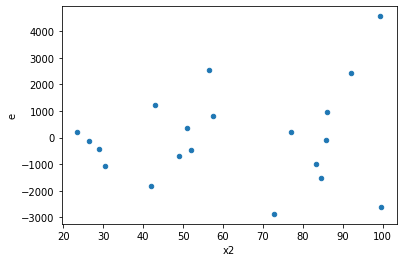

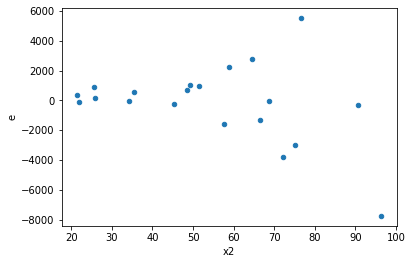

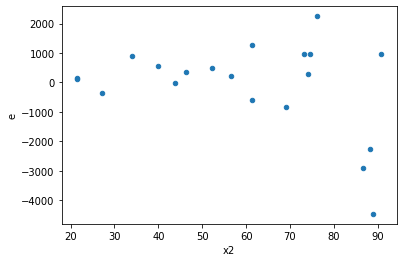

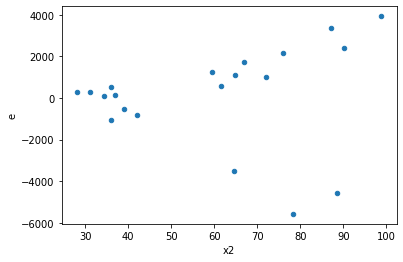

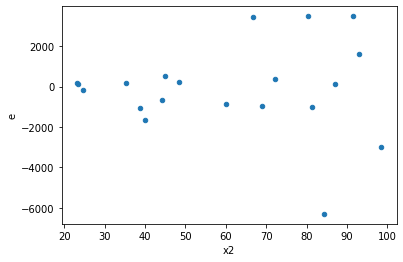

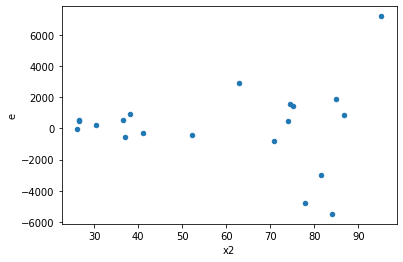

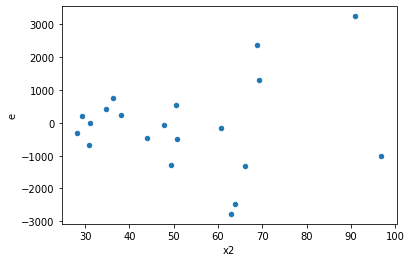

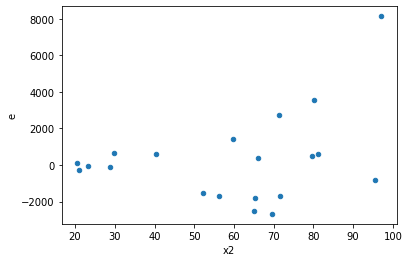

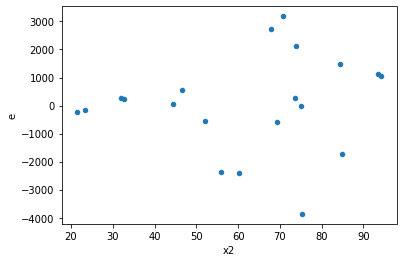

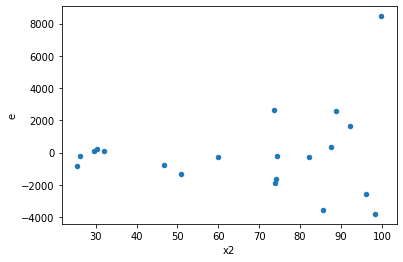

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [18]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,1004961.7037128601,27897816.732141048,200992.34074257204,5579563.34642821,27.76007944289992,0.002358736831615138,0.9988206315841924,0.001179368415807569,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,2803568.2781408643,60510884.57591587,560713.6556281729,12102176.915183175,21.583524484747905,0.0042719668147706,0.9978640165926147,0.0021359834073853,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,10134313.519675832,15585018.951912226,2026862.7039351664,3117003.7903824453,1.537846537079578,0.6482409961198297,0.6758795019400852,0.32412049805991483,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,3257283.0847976087,62857084.5834683,651456.6169595218,12571416.916693661,19.297396924705403,0.0055476521230863884,0.9972261739384568,0.0027738260615431942,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,2162060.88505779,11035586.865388168,432412.17701155803,2207117.373077634,5.104198009249493,0.09798056338048977,0.9510097183097551,0.048990281690244886,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,9592101.05294036,39452595.779515766,1918420.210588072,7890519.155903153,4.1130296232046035,0.146787158623229,0.9266064206883855,0.0733935793116145,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,2887237.4594944753,72578617.00472678,577447.491898895,14515723.400945356,25.13773737801065,0.0029841459098898238,0.9985079270450551,0.0014920729549449119,Reject001=0 : Heteroscedasticity
10.0,5.0,5.0,4715826.704282908,16117988.223485813,943165.3408565816,3223597.6446971623,3.4178499835134897,0.2035398564145896,0.8982300717927052,0.1017699282072948,Reject001=1 : Homoscedasticity
11.0,5.0,5.0,10870920.202638397,32903396.64235554,2174184.0405276795,6580679.328471107,3.026735182396961,0.24952166120120878,0.8752391693993956,0.12476083060060439,Reject001=1 : Homoscedasticity


In [20]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,1004961.7037128601,27897816.732141048,200992.34074257204,5579563.34642821,27.76007944289992,0.002358736831615138,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,83745886.19625047,1091424.474426797,16749177.239250094,218284.8948853594,0.013032574183633907,0.0002011560714500673,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,16559134.882812634,1148957.102472036,3311826.976562527,229791.42049440718,0.06938509231328159,0.010851253851899037,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,2803568.2781408643,60510884.57591587,560713.6556281729,12102176.915183175,21.583524484747905,0.0042719668147706,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,10134313.519675832,15585018.951912226,2026862.7039351664,3117003.7903824453,1.537846537079578,0.6482409961198297,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,3257283.0847976087,62857084.5834683,651456.6169595218,12571416.916693661,19.297396924705403,0.0055476521230863884,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,2162060.88505779,11035586.865388168,432412.17701155803,2207117.373077634,5.104198009249493,0.09798056338048977,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,9592101.05294036,39452595.779515766,1918420.210588072,7890519.155903153,4.1130296232046035,0.146787158623229,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,19750747.11390894,17507989.027425006,3950149.422781788,3501597.8054850013,0.8864469240809362,0.8979962624878469,Reject001=1 : Homoscedasticity


In [21]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      764
Reject001=0 : Heteroscedasticity    236
Name: Result_test, dtype: int64